In [1]:
from cassie import CassieEnv
import constants as c 
import functions as f 
import numpy as np
import loader as l 
import caps as cp 
import torch
from ray.tune.registry import register_env
from ray.rllib.agents.ppo import PPOTrainer
import mediapy as media 

DEBUG:matplotlib:matplotlib data path: c:\Users\Ajvendetta\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:CONFIGDIR=C:\Users\Ajvendetta\.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32


In [2]:
import tensorflow as tf 

In [1]:
import torch

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
device

device(type='cuda')

In [2]:

logdir = "./logs"
simdir = "./sims"
loader = l.Loader(logdir, simdir)
fps = 40

In [3]:
configs = loader.load_config("../ConfigSimplified.yaml")
flattened = {}
for key in configs.keys():
    for key2 in configs[key].keys():
        flattened[key2] = configs[key][key2]

{'training': {'gamma': 0.99, 'lr': 0.01, 'train_batch_size': 15000, 'model': {'fcnet_hiddens': [256, 256], 'fcnet_activation': 'swish', 'vf_share_layers': False, 'free_log_std': True}, 'optimizer': {'type': 'adam', 'eps': '1e-06'}, 'use_critic': True, 'use_gae': True, 'lambda_': 0.95, 'kl_coeff': 0.2, 'sgd_minibatch_size': 5000, 'num_sgd_iter': 4, 'vf_loss_coeff': 0.5, 'entropy_coeff': 0.01, 'clip_param': 0.2, 'kl_target': 0.01}, 'environment': {'env': 'cassie-v0', 'disable_env_checking': True}, 'framework': {'framework': 'torch'}, 'rollouts': {'recreate_failed_workers': True, 'num_workers': 20, 'num_envs_per_worker': 4, 'rollout_fragment_length': 'auto', 'batch_mode': 'truncate_episodes', 'observation_filter': 'NoFilter', 'reuse_actors': True}, 'evaluation': {'evaluation_interval': 2, 'evaluation_duration': 10}, 'resources': {'num_cpus_per_worker': 1, 'num_gpus_per_worker': 0}}


In [4]:
register_env("cassie-v0", lambda config: CassieEnv(config))

In [5]:
env = CassieEnv(flattened)
env.reset()

(array([ 3.94543488e-01,  4.98137367e-01,  3.84046016e-01,  8.77828781e-01,
         1.27452345e+00,  5.00137818e-01, -4.08234335e-01,  1.27276320e+00,
         5.97451523e-01,  5.03364413e-01,  3.85636254e-01,  1.19204055e+00,
         1.27021091e+00,  4.99881401e-01, -4.08306491e-01,  1.27267695e+00,
         5.00121547e-01,  4.99933041e-01,  4.99934411e-01,  9.99927332e-01,
         1.25756167e-03, -9.26721955e-03,  7.60711154e-03,  0.00000000e+00,
         1.00000000e+00]),
 {})

In [6]:
caps = cp.CAPSTorchPolicy(env.observation_space, env.action_space, {})

2023-04-23 15:28:02,288	INFO policy.py:1214 -- Policy (worker=local) running on CPU.
2023-04-23 15:28:02,290	INFO torch_policy_v2.py:110 -- Found 0 visible cuda devices.


In [7]:
train_batch = {'obs': [], 'actions': []}
for i in range(2):
    obs, reward, done,_, info = env.step(env.action_space.sample())
    train_batch['obs'].append(obs)
    train_batch['actions'].append(env.action_space.sample())
    if done:
        env.reset()

train_batch['obs'] = np.array(train_batch['obs'])
train_batch['actions'] = np.array(train_batch['actions'])


In [8]:
train_batch['obs'][0]

array([ 3.94162124e-01,  4.85450696e-01,  3.87930154e-01,  8.80895194e-01,
        1.24410912e+00,  5.00511052e-01, -4.08207170e-01,  1.27215491e+00,
        6.03364025e-01,  5.17274740e-01,  3.89908926e-01,  1.18400891e+00,
        1.25070071e+00,  5.00905028e-01, -4.08251269e-01,  1.27228674e+00,
        4.92907233e-01,  5.25982898e-01,  4.99413545e-01,  9.99961089e-01,
       -1.15715682e-04, -4.42433459e-03,  7.63099377e-03,  0.00000000e+00,
        1.00000000e+00])

In [9]:
import tensorflow as tf
from tensorflow import keras

# Check if GPU is available
print(tf.test.gpu_device_name())


# Define the model
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_dim=25, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(10, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [10]:
torch.tensor(c.act_ranges[:,1]-c.act_ranges[:,0])

C:\Users\Ajvendetta\AppData\Local\Temp\ipykernel_6588\2800571735.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(c.act_ranges[:,1]-c.act_ranges[:,0])


tensor([ 9.0000,  9.0000, 24.4000, 24.4000,  1.8000,  9.0000,  9.0000, 24.4000,
        24.4000,  1.8000])

In [12]:
train_batch = {'obs': [], 'actions': []}
for i in range(2):
    obs, reward, done,_, info = env.step(env.action_space.sample())
    train_batch['obs'].append(obs)
    train_batch['actions'].append(env.action_space.sample())
    if done:
        env.reset()

train_batch['obs'] = np.array(train_batch['obs'])
train_batch['actions'] = np.array(train_batch['actions'])

loss = 0 
# get the observations and actions
obs, actions = train_batch["obs"], train_batch["actions"]

logits = model.predict(obs)


#get a bunch of normal distribution around 
dist = torch.distributions.Normal(torch.tensor(obs), 0.01 )

around_obs = np.array(dist.sample())
print(around_obs)
logits_around = model.predict(around_obs)

logits_around = torch.tensor(logits_around)
logits = torch.tensor(logits)
print(logits)
print(logits_around)
L_S = torch.mean(torch.mean(torch.abs(logits-logits_around),axis=1))
L_T = torch.mean(f.action_dist(torch.tensor(actions[1:,:]),torch.tensor(actions[:-1,:])))
print(1000*L_S)
print(L_T)
# add the loss of the state around the observations to the loss
loss +=  L_S
loss += L_T

[[ 0.4175026   0.37585671  0.41340945  0.89713488  1.0840293   0.48205485
  -0.39823001  1.2733944   0.59783097  0.42902459  0.4267593   1.16540518
   1.0560858   0.48894202 -0.40552047  1.26407654  0.46256641  0.5291356
   0.51907911  0.980253   -0.0241695   0.02779659  0.03670049  0.47670319
   0.88002723]
 [ 0.44573498  0.33352224  0.43533267  0.90755711  1.07373781  0.49549114
  -0.39456088  1.26430217  0.59511599  0.39057908  0.42501381  1.13444051
   1.04441113  0.477965   -0.4218536   1.25680958  0.47417397  0.5184212
   0.53637142  1.00468132 -0.02812407  0.01788078  0.03846391  0.57992964
   0.80235768]]
tensor([[0.4277, 0.5240, 0.5117, 0.4996, 0.5041, 0.5532, 0.6227, 0.5167, 0.4375,
         0.4770],
        [0.4265, 0.5248, 0.5118, 0.4994, 0.5046, 0.5543, 0.6237, 0.5171, 0.4360,
         0.4769]])
tensor([[0.4278, 0.5236, 0.5119, 0.4997, 0.5038, 0.5532, 0.6237, 0.5167, 0.4376,
         0.4764],
        [0.4284, 0.5237, 0.5117, 0.4996, 0.5041, 0.5528, 0.6218, 0.5166, 0.4379,


In [13]:
loss

tensor(0.8022)

In [14]:
env.data.contact

<_MjContactList
  H: array([], shape=(0, 36), dtype=float64)
  dim: array([], dtype=int32)
  dist: array([], dtype=float64)
  efc_address: array([], dtype=int32)
  exclude: array([], dtype=int32)
  frame: array([], shape=(0, 9), dtype=float64)
  friction: array([], shape=(0, 5), dtype=float64)
  geom1: array([], dtype=int32)
  geom2: array([], dtype=int32)
  includemargin: array([], dtype=float64)
  mu: array([], dtype=float64)
  pos: array([], shape=(0, 3), dtype=float64)
  solimp: array([], shape=(0, 5), dtype=float64)
  solref: array([], shape=(0, 2), dtype=float64)
>

In [15]:
import mujoco as m 

In [16]:
contact_force_right_foot = np.zeros(6)
m.mj_contactForce(env.model, env.data, 0, contact_force_right_foot)
print(contact_force_right_foot)

[0. 0. 0. 0. 0. 0.]


In [17]:
env.render_mode = 'rgb_array'

In [18]:
right_forces = [    
]
left_forces = [
]

In [19]:
env.reset()

(array([ 3.95868734e-01,  4.95351436e-01,  3.84576703e-01,  8.78066172e-01,
         1.27603744e+00,  4.99988537e-01, -4.08263210e-01,  1.27279348e+00,
         6.01703619e-01,  5.04873003e-01,  3.83930013e-01,  1.19298339e+00,
         1.26867539e+00,  4.99953059e-01, -4.08223188e-01,  1.27264624e+00,
         5.00140768e-01,  5.00133913e-01,  5.00047380e-01,  9.99975826e-01,
         3.04751852e-03, -4.45934914e-04,  6.23383034e-03,  0.00000000e+00,
         1.00000000e+00]),
 {})

In [21]:
np.where(env.model.name_bodyadr == 7)

(array([0], dtype=int64),)

DEBUG:matplotlib:CACHEDIR=C:\Users\Ajvendetta\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\Ajvendetta\.matplotlib\fontlist-v330.json
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Ajvendetta\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Ajvendetta\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizO

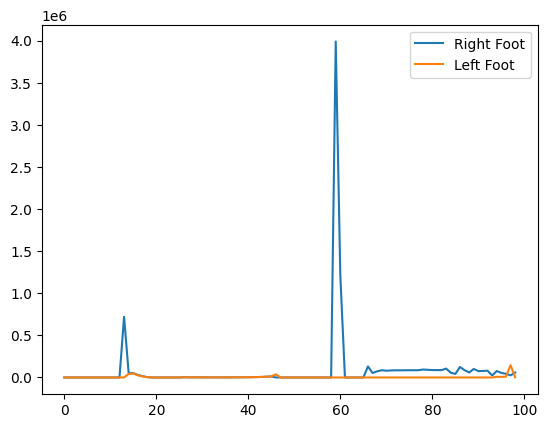

In [23]:
env.reset()

contact_force_right_foot = np.zeros(6)
frames = []
for i in range(100):
    env.step(np.zeros(10))

    x = np.zeros(6)
    m.mj_contactForce(env.model, env.data, 0, x)
    right_forces.append(np.linalg.norm(x))
    x = np.zeros(6)
    m.mj_contactForce(env.model, env.data, 1, x)
    left_forces.append(np.linalg.norm(x))
    frames.append(env.render())
media.show_video(frames,fps = fps)

import matplotlib.pyplot as plt

#remove values that are extremely high
right_forces = [x**2 for x in right_forces if x < 4000]
left_forces = [x**2 for x in left_forces if x < 4000]

plt.plot(right_forces)
plt.plot(left_forces)
plt.legend(["Right Foot", "Left Foot"])
plt.show()

In [38]:
env.reset()

(array([ 0.39432865,  0.50236159,  0.38434551,  0.87864973,  1.2754809 ,
         0.50013313, -0.40825936,  1.27278235,  0.59854465,  0.50516533,
         0.38425246,  1.19270577,  1.27518219,  0.50010871, -0.40816247,
         1.27277637,  0.50002741,  0.49999813,  0.50007933,  0.99994335,
        -0.00707369, -0.00784488, -0.00131375,  0.        ,  1.        ]),
 {})

In [59]:

contact_force_right_foot = np.zeros(6)
env.step(np.zeros(10))
for j,_ in enumerate(env.data.contact):
    m.mj_contactForce(env.model, env.data, j, contact_force_right_foot)
    print(np.linalg.norm(contact_force_right_foot))

In [ ]:
phases = np.random.rand(10)*2*np.pi

In [ ]:
# phases = np.array([6.18362032, 1.70033932, 4.43265421, 5.00719267, 4.62093139,
#        5.64687259, 2.36063639, 1.51925016, 1.33412746, 3.90058806])

In [ ]:
phases = np.zeros(10)

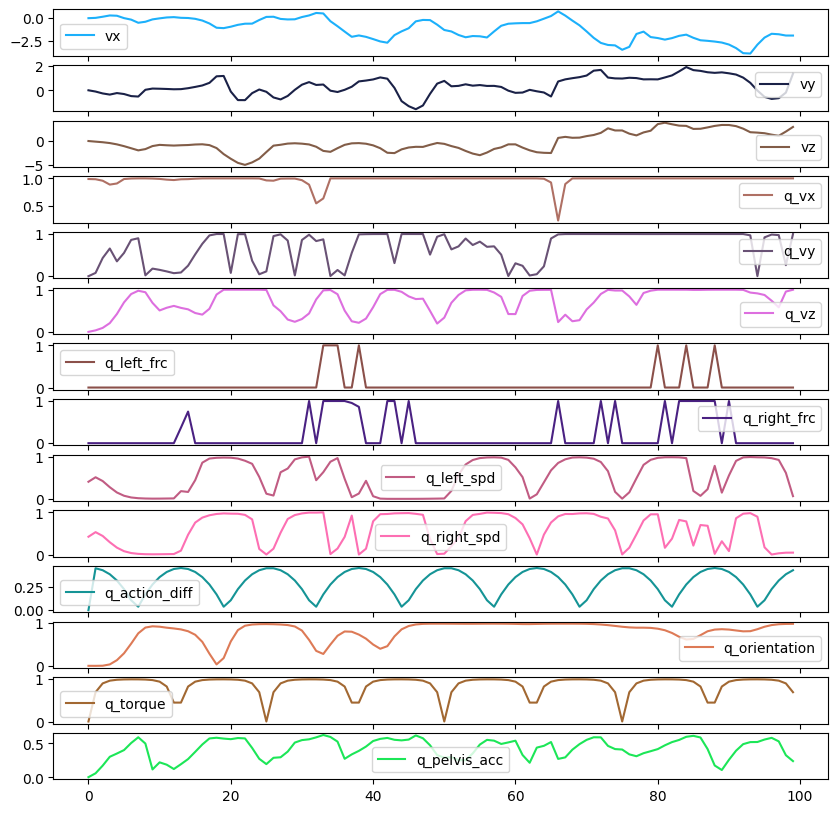

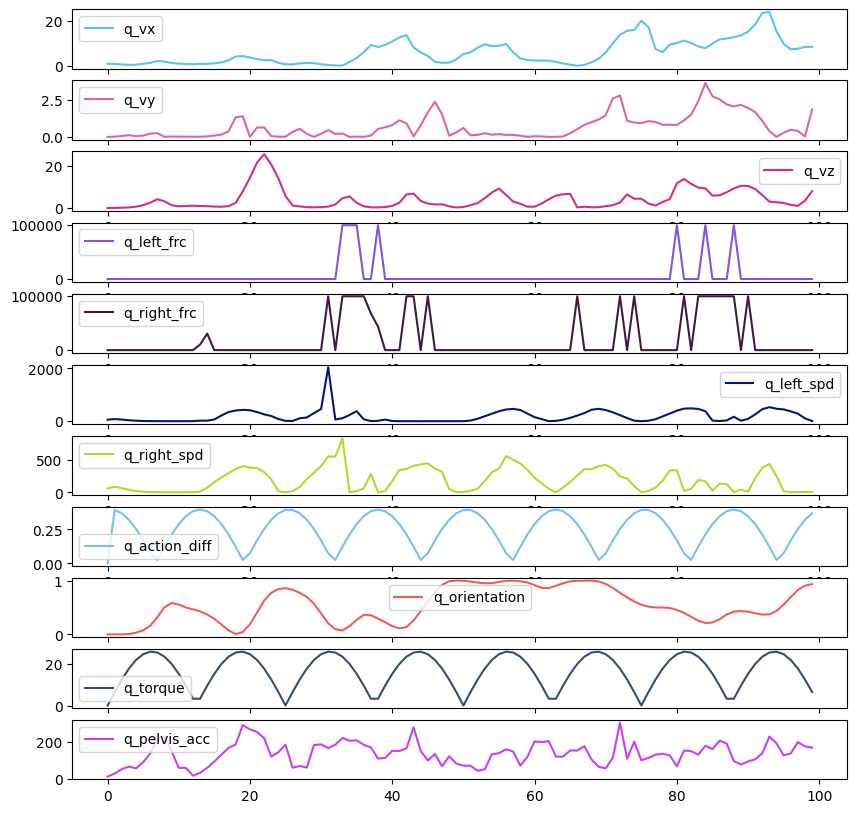

In [ ]:
#show a video of 100steps of the environment and register some metrics 
env = CassieEnv(flattened)
env.reset()
env.render_mode = "rgb_array"
metrics = {}
frames = []
metrics["vx"] = []
metrics["vy"] = []
metrics["vz"] = []
exponents = {}
max_steps = 100
number_of_rounds = 4
print
for i in range(max_steps):
    action = np.sin(number_of_rounds*i/max_steps*2*np.pi+phases)*np.array(list(c.actuator_ranges.values()))[:,1]
    observation, reward, terminated, _, _ = env.step(action)
    frames.append(env.render())
    metrics["vz"] .append( env.data.qvel[2])
    metrics["vx"] .append( env.data.qvel[0])
    metrics["vy"] .append( env.data.qvel[1])
    for exponent, value in env.exponents.items():
        if exponent not in exponents.keys():
            exponents[exponent] = [value]
        else:
            exponents[exponent].append(value)
    for metric,value in env.used_quantities.items():
        if metric not in metrics.keys():
            metrics[metric] = [value]
        else:
            metrics[metric].append(value)
env.close()
#save video 
media.show_video( frames, fps=fps)
#plot the metrics stacked in a vertical way in multiple subplots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(metrics.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(metrics.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(metrics[metric], color=s)
    axs[i].legend([metric])

plt.show()


#do the same thing for the exponents
fig, axs = plt.subplots(len(exponents.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(exponents.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(np.clip(exponents[metric],0,100000), color=s)
    axs[i].legend([metric])

plt.show()



DEBUG:matplotlib:CACHEDIR=C:\Users\Ajvendetta\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\Ajvendetta\.matplotlib\fontlist-v330.json
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Ajvendetta\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Ajvendetta\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizO

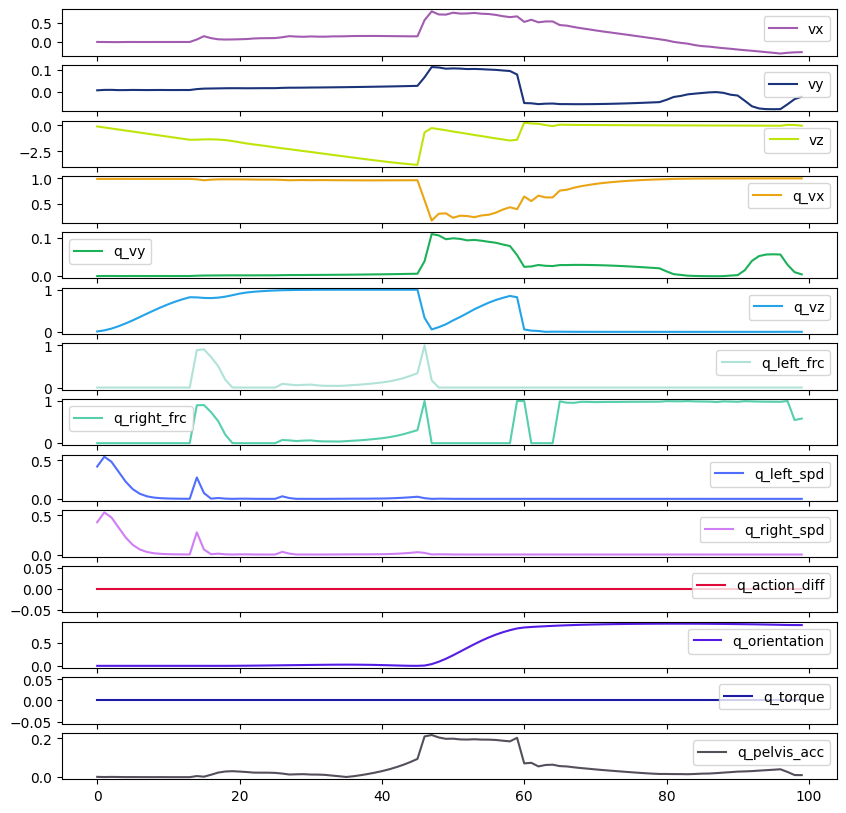

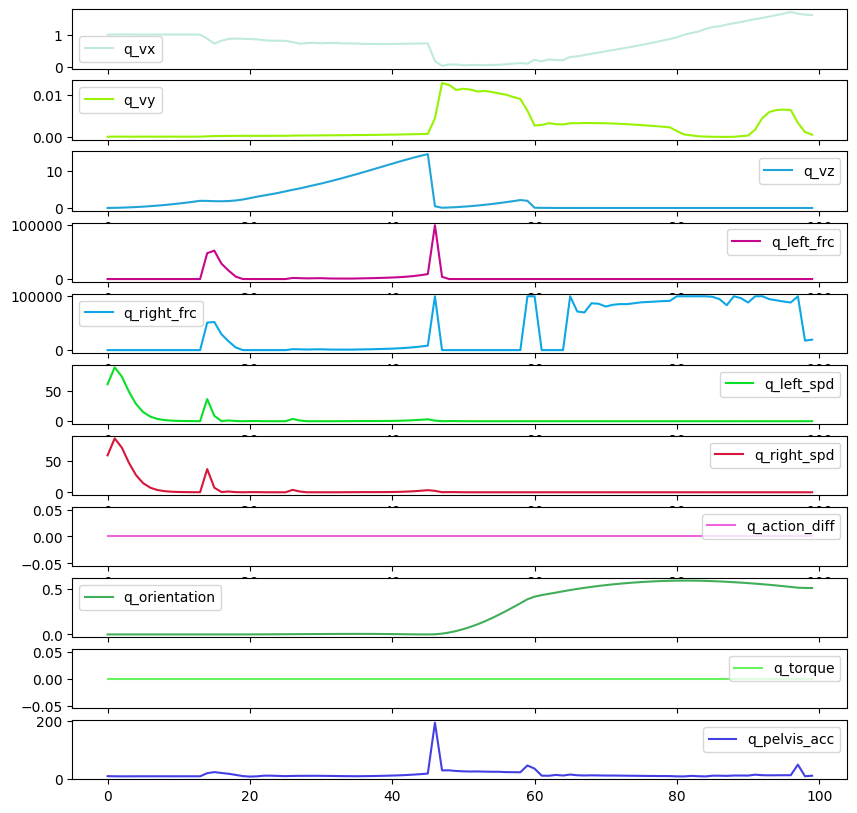

In [ ]:
#show a video of 100steps of the environment and register some metrics 
env = CassieEnv(flattened)
env.reset()
env.render_mode = "rgb_array"
metrics = {}
frames = []
metrics["vx"] = []
metrics["vy"] = []
metrics["vz"] = []
exponents = {}
max_steps = 100
number_of_rounds = 4
print
for i in range(max_steps):
    action = np.zeros(10)
    observation, reward, terminated, _, _ = env.step(action)
    frames.append(env.render())
    metrics["vz"] .append( env.data.qvel[2])
    metrics["vx"] .append( env.data.qvel[0])
    metrics["vy"] .append( env.data.qvel[1])
    for exponent, value in env.exponents.items():
        if exponent not in exponents.keys():
            exponents[exponent] = [value]
        else:
            exponents[exponent].append(value)
    for metric,value in env.used_quantities.items():
        if metric not in metrics.keys():
            metrics[metric] = [value]
        else:
            metrics[metric].append(value)
env.close()
#save video 
media.show_video( frames, fps=fps)
#plot the metrics stacked in a vertical way in multiple subplots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(metrics.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(metrics.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(metrics[metric], color=s)
    axs[i].legend([metric])

plt.show()


#do the same thing for the exponents
fig, axs = plt.subplots(len(exponents.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(exponents.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(np.clip(exponents[metric],0,100000), color=s)
    axs[i].legend([metric])

plt.show()



In [ ]:
# trainer = PPOTrainer(env = 'cassie-v0',config = flattened)

In [ ]:
trainer.train()

NameError: name 'trainer' is not defined